<a href="https://colab.research.google.com/github/saanikul3241/MatchMe/blob/main/MatchMe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image loaded successfully.
Image shape: (795, 587, 3)
Average Pixel Value : [112.07182774 154.45578567 218.89053254]
Hex Color Code: #DB9B70


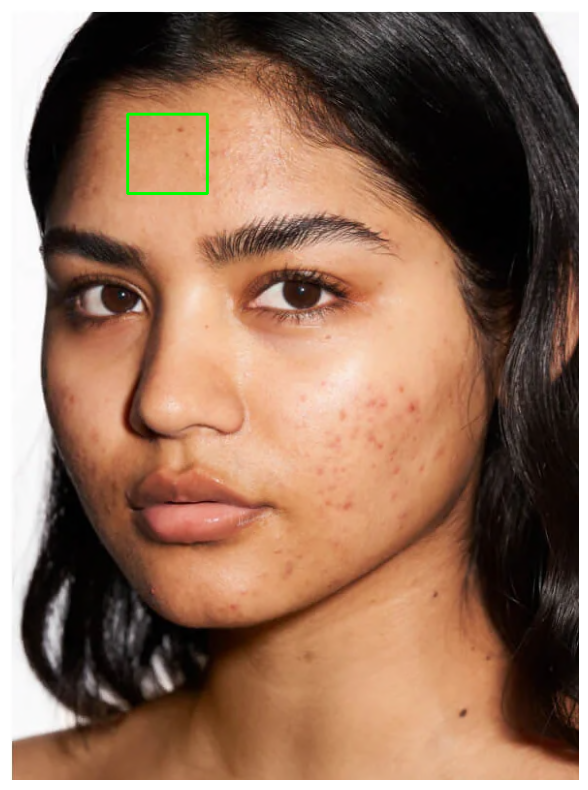

In [3]:
!pip install opencv-python
import cv2 as cv
import numpy as np

imagePath = '/input_image.jp2'

#read image
img = cv.imread(imagePath)

if img is None:
    print("Error: Image not loaded. Check the image path.")
else:
    print("Image loaded successfully.")
    print("Image shape:", img.shape)


img.shape

#convert to grayscale
gray_img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray_img.shape

face_classifier = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_classifier = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_eye.xml")

face = face_classifier.detectMultiScale(gray_img,scaleFactor=1.1, minNeighbors=5, minSize = (30,30))

for (x,y,w,h) in face:

   roi_gray = gray_img[y:y + h, x:x+w]
   eyes = eye_classifier.detectMultiScale(roi_gray)
   forehead_x = x + 10*x
   forehead_y = y
   forehead_width = w // 6
   forehead_height = h // 6

cv.rectangle(img,(forehead_x, forehead_y), (forehead_x + forehead_width, forehead_y + forehead_height), (0,255,0),2)
#save a new image with the dimensions of the cv.rectangle
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
cropped_image = img[forehead_y:forehead_y + forehead_height, forehead_x:forehead_x + forehead_width]
cropped_image = np.uint8(cropped_image)
cv.imwrite("cropped_image.jpg", cropped_image)

border_size = 2

#calculate the new coordinates and dimensions for the cropped image
new_x = forehead_x + border_size
new_y = forehead_y + border_size
new_width = forehead_width - 2 * border_size
new_height = forehead_height - 2 * border_size

#create a new cropped image with the border excluded
final_cropped_image = cropped_image[border_size:border_size + new_height, border_size:border_size + new_width]

#cave the final cropped image as a new file
cv.imwrite("final_cropped_image.jpg", final_cropped_image)

import matplotlib.pyplot as plt

#plt.figure(figsize = (20,10))
#plt.imshow(img_rgb)
#plt.axis('off')

average_pixel_value = np.mean(final_cropped_image,axis = (0,1))


print(f"Average Pixel Value : {average_pixel_value}")

tolerance = 10

# Calculate the average RGB values
average_rgb = np.mean(final_cropped_image, axis=(0, 1))

# Filter RGB values that are within the tolerance
filtered_image = np.clip(final_cropped_image, 0, 255)
filtered_rgb = np.where(
    np.abs(filtered_image - average_rgb) <= tolerance,
    filtered_image,
    average_rgb
)


plt.figure(figsize = (10,10))
plt.imshow(img_rgb)
plt.axis('off')
# Calculate the new average RGB values
new_average_rgb = np.mean(filtered_rgb, axis=(0, 1))




hex_color = "#{:02X}{:02X}{:02X}".format(
    int(new_average_rgb[2]),
    int(new_average_rgb[1]),
    int(new_average_rgb[0])
)
#print(f"Final Pixel Value : {final_pixel_value}")
print(f"Hex Color Code: {hex_color}")


# New Section

# New Section

In [4]:
data = {
    100: {"Hex": "#fdd0ad", "Undertone": "N"},
    105: {"Hex": "#fedba6", "Undertone": "W"},
    110: {"Hex": "#fdd2b0", "Undertone": "C"},
    120: {"Hex": "#fcd5b3", "Undertone": "N"},
    125: {"Hex": "#e3c1a0", "Undertone": "N"},
    130: {"Hex": "#eac08c", "Undertone": "W"},
    140: {"Hex": "#e2b681", "Undertone": "W"},
    145: {"Hex": "#e9c187", "Undertone": "W"},
    150: {"Hex": "#d7a87f", "Undertone": "N"},
    160: {"Hex": "#e9ab85", "Undertone": "W"},
    170: {"Hex": "#e0aa87", "Undertone": "C"},
    175: {"Hex": "#dbb48c", "Undertone": "N"},
    180: {"Hex": "#e1a878", "Undertone": "W"},
    185: {"Hex": "#fcd6b3", "Undertone": "N"},
    190: {"Hex": "#e0ad7f", "Undertone": "W"},
    200: {"Hex": "#e3ab7f", "Undertone": "C"},
    210: {"Hex": "#efb88f", "Undertone": "N"},
    220: {"Hex": "#dba37b", "Undertone": "W"},
    225: {"Hex": "#e4b685", "Undertone": "N"},
    230: {"Hex": "#dba37f", "Undertone": "N"},
    235: {"Hex": "#e9ab66", "Undertone": "W"},
    240: {"Hex": "#d39f76", "Undertone": "W"},
    250: {"Hex": "#d89960", "Undertone": "W"},
    255: {"Hex": "#e3aa64", "Undertone": "W"},
    260: {"Hex": "#d69f7b", "Undertone": "N"},
    265: {"Hex": "#d4a87a", "Undertone": "N"},
    270: {"Hex": "#c7865b", "Undertone": "C"},
    280: {"Hex": "#c8875a", "Undertone": "N"},
    290: {"Hex": "#c88859", "Undertone": "W"},
    295: {"Hex": "#d8a171", "Undertone": "N"},
    300: {"Hex": "#c89063", "Undertone": "W"},
    310: {"Hex": "#d1915f", "Undertone": "W"},
    315: {"Hex": "#d79b65", "Undertone": "N"},
    320: {"Hex": "#cd8e63", "Undertone": "W"},
    330: {"Hex": "#d2955e", "Undertone": "W"},
    335: {"Hex": "#bf8550", "Undertone": "N"},
    340: {"Hex": "#a06c48", "Undertone": "W"},
    345: {"Hex": "#c78d51", "Undertone": "W"},
    350: {"Hex": "#b67b45", "Undertone": "N"},
    360: {"Hex": "#af7846", "Undertone": "N"},
    370: {"Hex": "#c58462", "Undertone": "W"},
    380: {"Hex": "#c5845d", "Undertone": "C"},
    385: {"Hex": "#b47a39", "Undertone": "N"},
    390: {"Hex": "#a5693d", "Undertone": "W"},
    400: {"Hex": "#a25b28", "Undertone": "W"},
    410: {"Hex": "#a55f31", "Undertone": "W"},
    420: {"Hex": "#b3733d", "Undertone": "W"},
    425: {"Hex": "#a05f3a", "Undertone": "N"},
    430: {"Hex": "#89532d", "Undertone": "W"},
    440: {"Hex": "#9b572b", "Undertone": "W"},
    445: {"Hex": "#8e5825", "Undertone": "W"},
    450: {"Hex": "#87554a", "Undertone": "N"},
    460: {"Hex": "#82472f", "Undertone": "W"},
    470: {"Hex": "#764328", "Undertone": "W"},
    480: {"Hex": "#6c3d24", "Undertone": "W"},
    485: {"Hex": "#5c2d1c", "Undertone": "N"},
    490: {"Hex": "#64371b", "Undertone": "N"},
    495: {"Hex": "#572b18", "Undertone": "W"},
    498: {"Hex": "#572b18", "Undertone": "N"},
}

# Example usage:
print("Shade 100:")
print("Hex:", data[100]["Hex"])
print("Undertone:", data[100]["Undertone"])

# Initialize empty dictionaries for each undertone
warm_shades = {}
neutral_shades = {}
cool_shades = {}

# Iterate through the original data and sort into respective undertone dictionaries
for shade, shade_info in data.items():
    undertone = shade_info["Undertone"]
    if undertone == "W":
        warm_shades[shade] = shade_info
    elif undertone == "N":
        neutral_shades[shade] = shade_info
    elif undertone == "C":
        cool_shades[shade] = shade_info

# Print or use the sorted datasets as needed
print("Warm Shades:")
print(warm_shades)
print("\nNeutral Shades:")
print(neutral_shades)
print("\nCool Shades:")
print(cool_shades)

Shade 100:
Hex: #fdd0ad
Undertone: N
Warm Shades:
{105: {'Hex': '#fedba6', 'Undertone': 'W'}, 130: {'Hex': '#eac08c', 'Undertone': 'W'}, 140: {'Hex': '#e2b681', 'Undertone': 'W'}, 145: {'Hex': '#e9c187', 'Undertone': 'W'}, 160: {'Hex': '#e9ab85', 'Undertone': 'W'}, 180: {'Hex': '#e1a878', 'Undertone': 'W'}, 190: {'Hex': '#e0ad7f', 'Undertone': 'W'}, 220: {'Hex': '#dba37b', 'Undertone': 'W'}, 235: {'Hex': '#e9ab66', 'Undertone': 'W'}, 240: {'Hex': '#d39f76', 'Undertone': 'W'}, 250: {'Hex': '#d89960', 'Undertone': 'W'}, 255: {'Hex': '#e3aa64', 'Undertone': 'W'}, 290: {'Hex': '#c88859', 'Undertone': 'W'}, 300: {'Hex': '#c89063', 'Undertone': 'W'}, 310: {'Hex': '#d1915f', 'Undertone': 'W'}, 320: {'Hex': '#cd8e63', 'Undertone': 'W'}, 330: {'Hex': '#d2955e', 'Undertone': 'W'}, 340: {'Hex': '#a06c48', 'Undertone': 'W'}, 345: {'Hex': '#c78d51', 'Undertone': 'W'}, 370: {'Hex': '#c58462', 'Undertone': 'W'}, 390: {'Hex': '#a5693d', 'Undertone': 'W'}, 400: {'Hex': '#a25b28', 'Undertone': 'W'}, 410

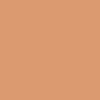

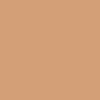

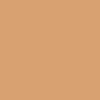

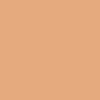

In [5]:
import colorsys
from PIL import Image
from IPython.display import display, HTML

#hex_color = "#DB9B70"

# Function to calculate color difference
def color_difference(hex1, hex2):
    r1, g1, b1 = tuple(int(hex1.lstrip("#")[i:i+2], 16) for i in (0, 2, 4))
    r2, g2, b2 = tuple(int(hex2.lstrip("#")[i:i+2], 16) for i in (0, 2, 4))
    return (r1 - r2) ** 2 + (g1 - g2) ** 2 + (b1 - b2) ** 2

# Find the best match for each undertone
def find_best_match(hex_color, undertone_shades):
    best_match = None
    best_color_diff = float('inf')

    for shade, shade_info in undertone_shades.items():
        shade_hex = shade_info["Hex"]
        diff = color_difference(hex_color, shade_hex)

        if diff < best_color_diff:
            best_color_diff = diff
            best_match = (shade, shade_hex)

    return best_match

# Find the best match for each undertone
best_warm_match = find_best_match(hex_color, warm_shades)
best_neutral_match = find_best_match(hex_color, neutral_shades)
best_cool_match = find_best_match(hex_color, cool_shades)


warm_title = "Best Warm Match: " +  str(best_warm_match)   # Replace with your desired title
neutral_title = "Best Neutral Match: " +  str(best_neutral_match)   # Replace with your desired title
cool_title = "Best Cool Match: " +  str(best_cool_match)   # Replace with your desired title
title = "Skintone Sample"

# Create a blank image with a single pixel
image = Image.new("RGB", (100, 100), hex_color)
# Display the image with a title
display(HTML(f"<h2>{title}</h2>"))
display(image)

# Create a blank image with a single pixel
image1 = Image.new("RGB", (100, 100), best_warm_match[1])
# Display the image with a title
display(HTML(f"<h2>{warm_title}</h2>"))
display(image1)


# Create a blank image with a single pixel
image2 = Image.new("RGB", (100, 100), best_neutral_match[1])
# Display the image with a title
display(HTML(f"<h2>{neutral_title}</h2>"))
display(image2)


# Create a blank image with a single pixel
image3 = Image.new("RGB", (100, 100), best_cool_match[1])
# Display the image with a title
display(HTML(f"<h2>{cool_title}</h2>"))
display(image3)